<a href="https://colab.research.google.com/github/Mahrukhw/omdena/blob/main/Dealing_with_missing_data_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('accident_data.csv')

# Investigating missing data

In [ ]:
df.isnull().mean()*100

Accident_Index                                  0.000000
1st_Road_Class                                 29.143266
1st_Road_Number                                 0.000191
2nd_Road_Class                                 41.944925
2nd_Road_Number                                 1.030255
Accident_Severity                               0.000000
Carriageway_Hazards                             0.002766
Date                                            0.000000
Day_of_Week                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident     0.025654
Junction_Control                                0.000000
Junction_Detail                                 0.000000
Latitude                                        0.010586
Light_Conditions                                0.198746
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
Location_Easting_OSGR                           0.010586
Location_Northing_OSGR         

<AxesSubplot:>

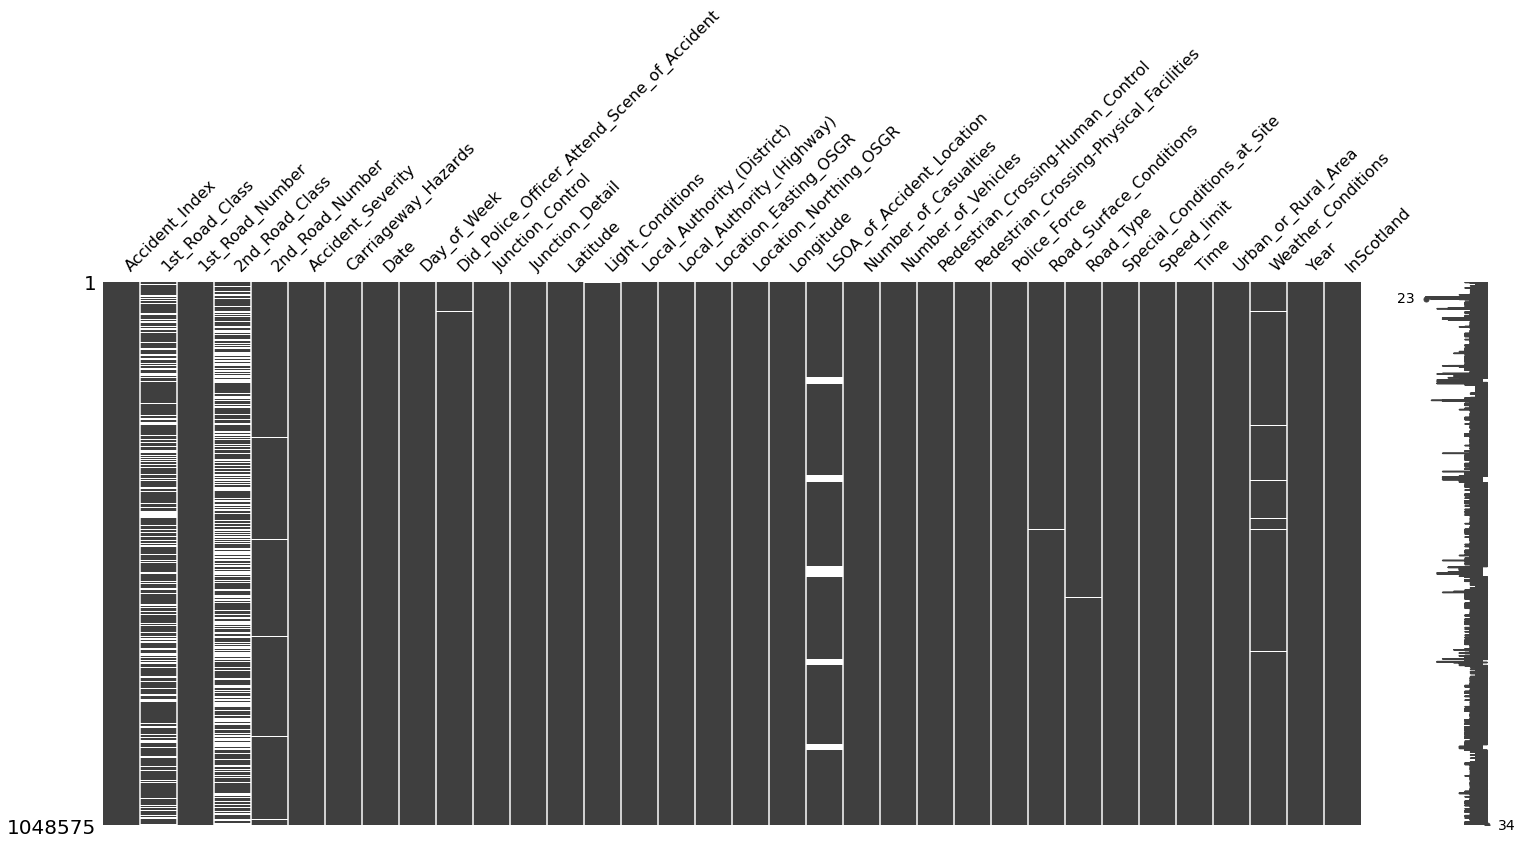

In [ ]:
import missingno as msno

msno.matrix(df)

## Which impuation technique should be used?
### 1. Complete Case Analysis (Dropping the missing data)
##### When the missing data is 3 to 5 percent of the total data, we can drop the corresponding Rows.
##### If the missing data is a huge portion of the total data, then we can drop the corresponding Columns. BUT, if the column is highly correlated to the target variable or is sensitive to the target variable in any way then we don't want to drop the columns.

### Columns that are missing upto 5 percent missing data

In [ ]:
cols_upto_5=[var for var in df.columns if df[var].isnull().mean() < 0.05 and 
            df[var].isnull().mean() > 0]

cols_upto_5

['1st_Road_Number',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland']

In [ ]:
# get 5 samples
df[cols_upto_5].sample(5)

,1st_Road_Number,2nd_Road_Number,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Light_Conditions,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
619073,6280.0,167.0,None,1.0,54.524513,Daylight,429210.0,514450.0,-1.550204,0.0,0.0,Wet or damp,Roundabout,None,14:15,Urban,Raining no high winds,No
1026256,273.0,0.0,None,1.0,50.943075,Daylight,530630.0,117610.0,-0.141983,0.0,0.0,Dry,Single carriageway,None,17:34,Rural,Fine no high winds,No
513046,3.0,0.0,None,1.0,51.038493,Darkness - no lighting,448080.0,126800.0,-1.315632,0.0,0.0,Wet or damp,Dual carriageway,None,18:14,Rural,Fine no high winds,No
653268,230.0,0.0,None,2.0,53.119693,Daylight,443960.0,358260.0,-1.344604,0.0,0.0,Dry,Single carriageway,None,08:07,Rural,Fine no high winds,No
351749,386.0,0.0,None,1.0,50.834259,Daylight,253890.0,105920.0,-4.076320,0.0,0.0,Dry,Single carriageway,None,15:20,Rural,Fine no high winds,No


In [ ]:
# how much data will be left if we drop all the missing data in cols_upto_5

len(df[cols_upto_5].dropna())/len(df)

0.9612292873661874

We'd be left with 96 percent data after dropping. Lets drop the rows

In [ ]:
new_df= df[cols_upto_5].dropna()
df.shape, new_df.shape

((1048575, 34), (1007921, 18))

#### Check the impact of dropping the data on distributions

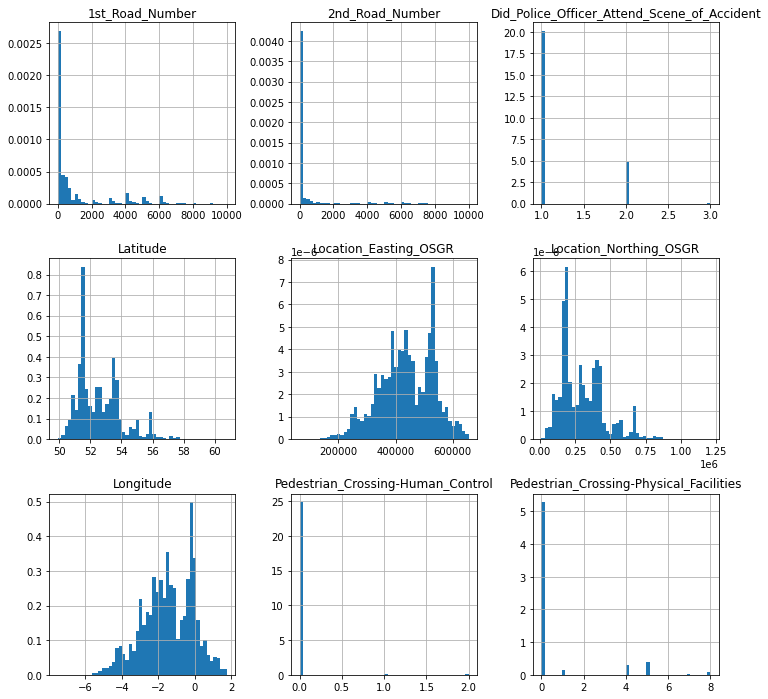

In [ ]:
# distributions of dataset prior to dropping missing data
import matplotlib.pyplot as plt

df[cols_upto_5].hist(bins=50, density=True, figsize=(12,12))
plt.show()

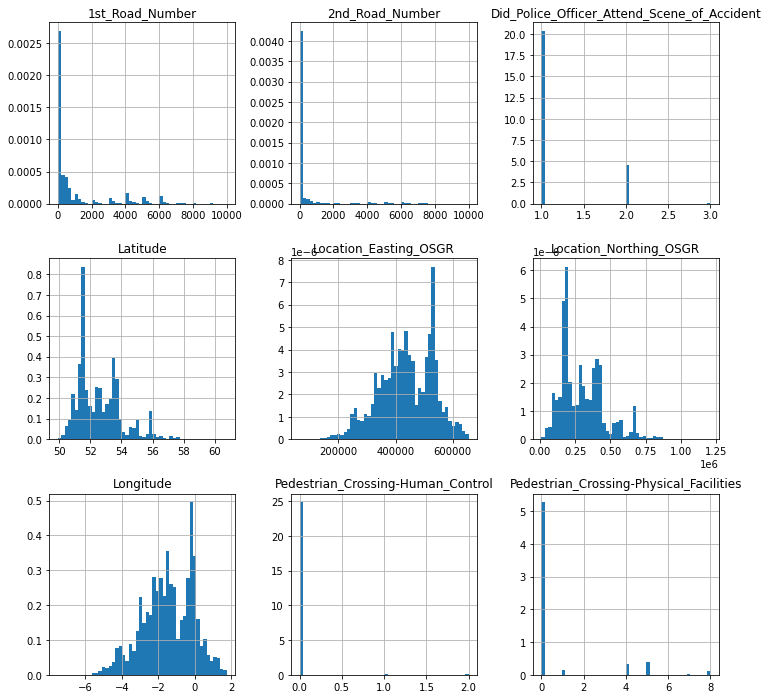

In [ ]:
# distributions of dataset after to dropping missing data


new_df[cols_upto_5].hist(bins=50, density=True, figsize=(12,12))
plt.show()

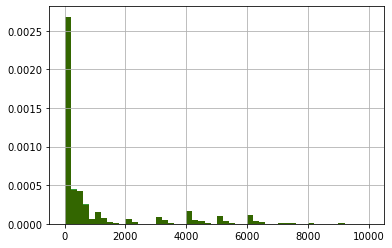

In [ ]:
# plotting the prior and after datasets on top of each other

#fig=plt.figure()
#ax=fig.add_subplot()
fig, ax = plt.subplots()

df['1st_Road_Number'].hist(bins=50, ax=ax, density=True, color='red')

new_df["1st_Road_Number"].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

plt.show()

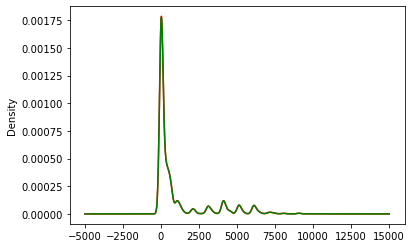

In [ ]:
fig, ax = plt.subplots()

df['1st_Road_Number'].plot.density(color='red')

new_df["1st_Road_Number"].plot.density(color='green')
plt.show()

In [ ]:
# check the change in percentage before and after dropping null rows
# for numeric columns

temp=pd.concat([
    df['1st_Road_Number'].value_counts()/len(df),
    new_df['1st_Road_Number'].value_counts()/len(new_df)
], axis=1)

temp.columns=['before', 'after']
temp

,before,after
0.0,2.735570e-01,2.720521e-01
1.0,1.319410e-02,1.345344e-02
6.0,1.144220e-02,1.147114e-02
4.0,9.430894e-03,9.337041e-03
25.0,6.752021e-03,6.826924e-03
...,...,...
7581.0,9.536752e-07,9.921412e-07
7630.0,9.536752e-07,9.921412e-07
7262.0,9.536752e-07,9.921412e-07
4134.0,9.536752e-07,9.921412e-07


In [ ]:
# check the change in percentage before and after dropping null rows
# for categorical columns

temp=pd.concat([
    df['Light_Conditions'].value_counts()/len(df),
    new_df['Light_Conditions'].value_counts()/len(new_df)
], axis=1)

temp.columns=['before', 'after']
temp

,before,after
Daylight,0.728642,0.729649
Darkness - lights lit,0.198338,0.200809
Darkness - no lighting,0.057979,0.058804
Darkness - lighting unknown,0.008938,0.006621
Darkness - lights unlit,0.004116,0.004116


If the differences in percentages before and after are not too large, it means that dropping the missing data during CCA is reliable
##### Notice 'Darkness- lighting unknown' after CCA lost 0.002 percent values. We had 0.008 percent in total and we're left with 0.006 percent. That means, if the dataset has 10000000 rows then 'Darkness- lighting unknown' had 8000 values before performing CCA and has 6000 left after performing CCA. So, dropping 2000 values out of 8000 values is alarming and it should be considered.
Repeat this process for all the columns and investigate the change before and after. 